In [340]:
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import blosc
import io

# Tests for Bosslet Cutout Services

In [457]:
data = np.random.randint(0, 100, (256, 256, 256), dtype="uint8")
for i in range(data.shape[0]):
    data[i] += int(i/4)
for j in range(data.shape[2]):
    data[:,:,j] += int(j/4)

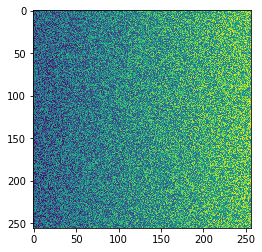

In [458]:
plt.imshow(data[0])

In [504]:
def post_data(data, col, exp, chan, origin=[0, 0, 0]):
    res = requests.post("http://localhost:5000/v1/cutout/{}/{}/{}/0/{}:{}/{}:{}/{}:{}/".format(
        col, exp, chan, 
        origin[0], origin[0] + data.shape[0],
        origin[1], origin[1] + data.shape[1],
        origin[2], origin[2] + data.shape[2]
    ), files={
        'file': data.tobytes()
    })
    return res

def get_data(col, exp, chan, xs, ys, zs):
    res = requests.get(
        "http://localhost:5000/v1/cutout/{}/{}/{}/0/{}:{}/{}:{}/{}:{}/".format(
            col, exp, chan, xs[0], xs[1], ys[0], ys[1], zs[0], zs[1]
        ),
        stream=True
    )
    if res.status_code == 200:
        try:
            js = res.json()
        except:
            print(res.text[:1000])
        return np.array(js['data'], dtype=js['dtype'])
    else:
        print(res.text[:1000])
        return res.json()
    

In [530]:
post_data(data[:130, :64, :64], "cc", "ee", "ch")

<Response [200]>

In [539]:
def test_subindex():
    newdata = get_data("cc", "ee", "ch", [0, 10], [0, 10], [0, 10])
    assert (newdata == data[:10, :10, :10]).all()

def test_get_full_file():
    newdata = get_data("cc", "ee", "ch", [0, 200], [0, 70], [0, 70])
    assert (newdata[:128, :50, :50] == data[:128, :50, :50]).all()
    
tests = [i() for i in
    [
        test_subindex,
        test_get_full_file
    ]
]

In [534]:
newdata = get_data("cc", "ee", "ch", [0, 200], [0, 70], [0, 70])

In [527]:
post_data(np.zeros((64, 64, 64), dtype="uint8"), "cc", "ee", "ch", [128, 0, 0])

<Response [200]>

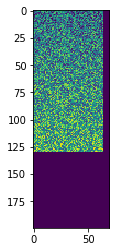

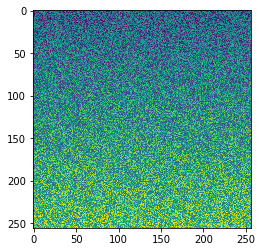

In [537]:
plt.imshow(newdata[:,:,0])
plt.show()
plt.imshow(data[:,:,0])